### In this assignment we will build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.model_selection import cross_val_score
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target


In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.data.shape)

(506, 13)


In [7]:
# creating a dataframe with naming columns
bs = pd.DataFrame(boston.data,columns=boston.feature_names)
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bs['PRICE'] = boston.target
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Minimum price of the data
minimum_price = np.min(boston.target)


# Maximum price of the data
maximum_price = np.max(boston.target)


# Mean price of the data
mean_price = np.mean(boston.target)


# Median price of the data
median_price = np.median(boston.target)

# standard deviation price of the data
std_price = np.std(boston.target)


# Show the calculated statistics

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price *1000))
print("Maximum price: ${:,.2f}".format(maximum_price *1000))
print("Mean price: ${:,.2f}".format(mean_price *1000))
print("Median price: ${:,.2f}".format(median_price *1000))
print("standard deviation price: ${:,.2f}".format(std_price *1000))


Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price: $21,200.00
standard deviation price: $9,188.01


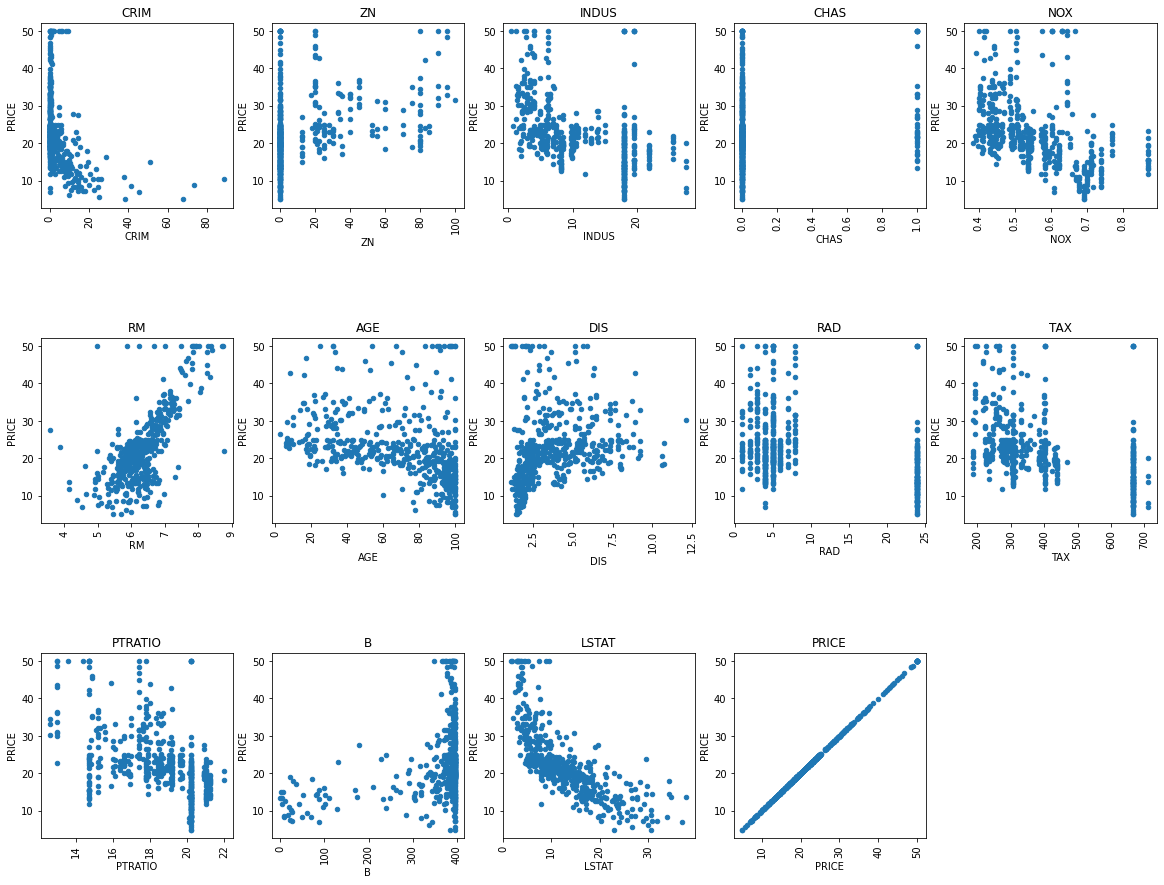

In [10]:
from matplotlib import pyplot as plt
from math import ceil


fig = plt.figure(figsize=(20,15))
cols=5
rows = ceil(float(bs.shape[1]) /cols)
for i, column in enumerate(bs.columns):
    axs = fig.add_subplot(rows,cols, i+1)
    axs.set_title(column)
    bs.plot(kind='scatter', x=column, y="PRICE", ax=axs)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)             

In [11]:
# the column that we want to predict.
y_column = bs['PRICE']

In [12]:
# the columns that we will be making predictions with
y_column = bs['PRICE']

# the columns that we will be making predictions with.
x_columns = bs.drop('PRICE', axis=1)


In [13]:
# split the data into training and test sets and scale the variables
X_train, X_test, y_train, y_test = train_test_split(x_columns,y_column, test_size =0.3, random_state = 25)


X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)


y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
y_test = y_scaler.transform(y_test[:,None])[:,0]


<ipython-input-13-11ca1b3c57a6>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
<ipython-input-13-11ca1b3c57a6>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test = y_scaler.transform(y_test[:,None])[:,0]


In [14]:
# Instance a random forest regressor simce we have to predict on continuos variables and fit the training set
from sklearn.ensemble import RandomForestRegressor
model =RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
from sklearn import metrics

y_pred= model.predict(X_test)

print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'),'%')

print("Mean Squarred Error:", format(metrics.mean_squarred_error(y_test,y_pred), '.2f'), '%')



Test Accuracy: 86.14 %


AttributeError: module 'sklearn.metrics' has no attribute 'mean_squarred_error'

In [23]:
# Performing gridsearch to tune the hyper parameters,
#then use the best estimator for scoring on the test set.
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.model_selection import cross_val_score


parameters = {'min_samples_split': [2,5,10],
                "max_depth": ['None', 2,3,10],
                "min_samples_leaf": [1,3,5],
               "max_features": ['auto', 'sqrt','log2'],  
               "n_estimators": [50,70,100]
              }

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters,
                              n_jobs=-1, verbose=1)

grid_search.fit(X_train,y_train)


print("Best parameters se found on development set:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:  1.4min


Best parameters se found on development set:

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.5min finished


In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy
print('Accuracy for test data set:\n')
y_pred = grid_search.predict(X_test)
print("test Accuracy:",format(metrics.r2_score(y_test, y_pred) *100, '.2f'),'%')
print('Mean squarred Error:', format(metrics.mean_squarred_error(y_test, y_pred), '.5f'))

Accuracy for test data set:

test Accuracy: 86.32 %


AttributeError: module 'sklearn.metrics' has no attribute 'mean_squarred_error'

In [ ]:
print("Accuracy score has increased by 55 after tuning the hyper parameters and mean squarred error is reduced from 0.16 to 0.11.")